In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

# Step 1: Reading and Understanding the Data

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Dictonary Link
https://drive.google.com/file/d/1x4Vi_FF0DEmTN1Cf6BnPHUuQP9p0s0Pz/view?usp=sharing

# Step 2: Preprocessing the Data

As column cnt is actually casual + registered and we are not interested in predicting the casual or registered but the cnt we can drop them
instant column serves as index but as it does not affect the cnt or have any effect on the data we can drop that

## Dropping the unnecessary columns

In [12]:
df.drop(['casual','registered','instant','dteday'],axis = 1 ,inplace = True)

In [13]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


## Mapping the labels for categorical variables for the EDA

In [15]:
#creating duplicate(deep) dataframe for EDA
df_EDA = df.copy()

In [16]:
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

In [17]:
df_EDA.season = df_EDA.season.map(season_map)

In [18]:
df_EDA

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [19]:
weekday_map = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5: 'Friday',6: 'Saturday',0:'Sunday'}

In [20]:
df_EDA.weekday = df_EDA.weekday.map(weekday_map)

In [21]:
df_EDA

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,Thursday,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,0,Friday,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,Saturday,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,Sunday,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [22]:
year_map = {0:2018,1:2019}

In [23]:
df_EDA.yr = df_EDA.yr.map(year_map)

In [24]:
df_EDA

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,Thursday,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,12,0,Friday,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,12,0,Saturday,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,12,0,Sunday,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [25]:
working_day_map = {0:'No',1:'Yes'}
holiday_map = {0:'No',1:'Yes'}

In [26]:
df_EDA.workingday = df_EDA.workingday.map(working_day_map)
df_EDA.holiday = df_EDA.holiday.map(holiday_map)

In [27]:
df_EDA

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,No,Saturday,No,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,No,Sunday,No,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,No,Monday,Yes,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,No,Tuesday,Yes,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,No,Wednesday,Yes,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,No,Thursday,Yes,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,12,No,Friday,Yes,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,12,No,Saturday,No,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,12,No,Sunday,No,1,10.489153,11.58500,48.3333,23.500518,1796


In [28]:
weather_map = {1: 'Clear Weather',
    		   2: 'Mist Weather',
        	   3: 'Light Snow, Light Rain',
		       4: 'Heavy Rain'}

In [29]:
df_EDA.weathersit = df_EDA.weathersit.map(weather_map)

In [30]:
month_map = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}
df_EDA.mnth = df_EDA.mnth.map(month_map)

In [31]:
df_EDA.mnth = df_EDA.mnth.astype('category')
df_EDA

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,Saturday,No,Mist Weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Sunday,No,Mist Weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Monday,Yes,Clear Weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Tuesday,Yes,Clear Weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Wednesday,Yes,Clear Weather,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,No,Thursday,Yes,Mist Weather,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,Dec,No,Friday,Yes,Mist Weather,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,Dec,No,Saturday,No,Mist Weather,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,Dec,No,Sunday,No,Clear Weather,10.489153,11.58500,48.3333,23.500518,1796


## As we have completed the mapping of categrical variables to labels we can start EDA

### Visualising Numeric Variables

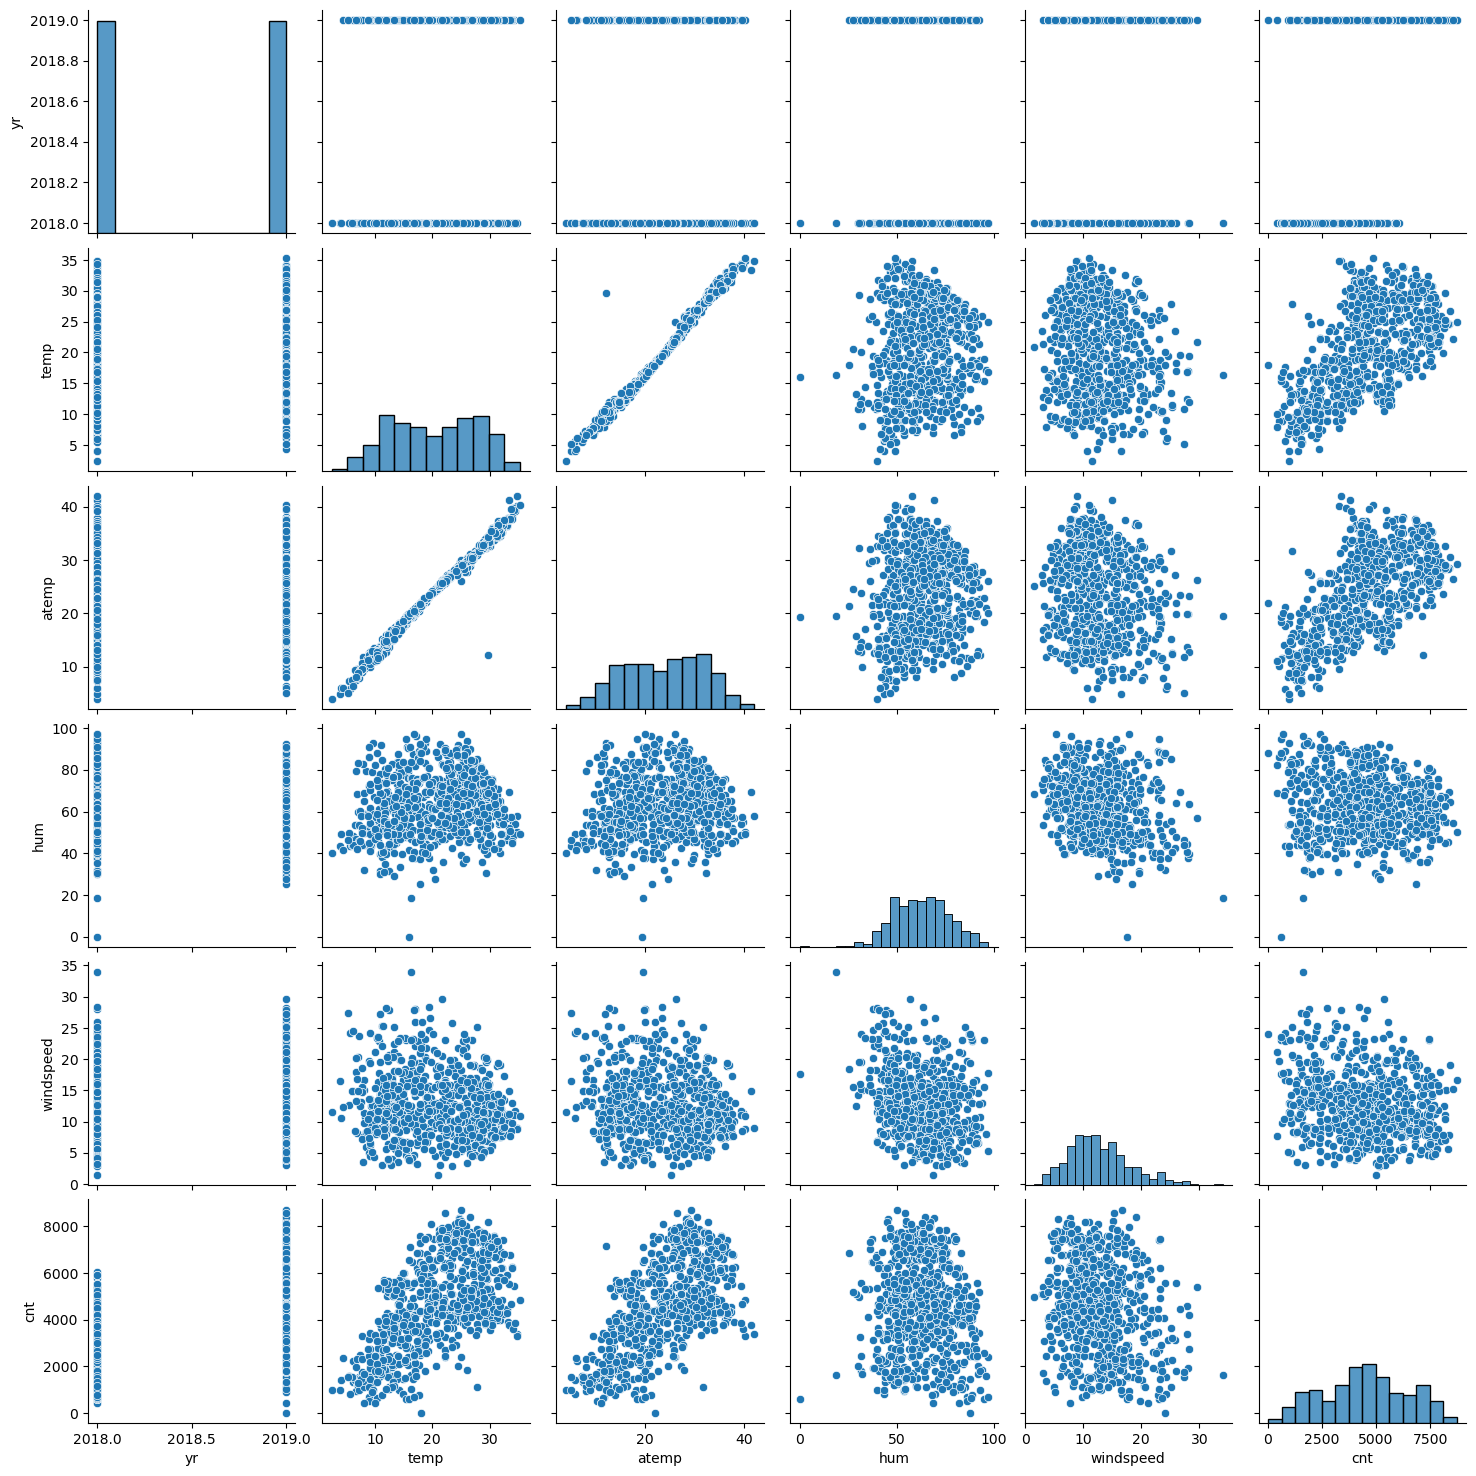

In [34]:
sns.pairplot(df_EDA)
plt.show()

### Visualising Categorical Variables

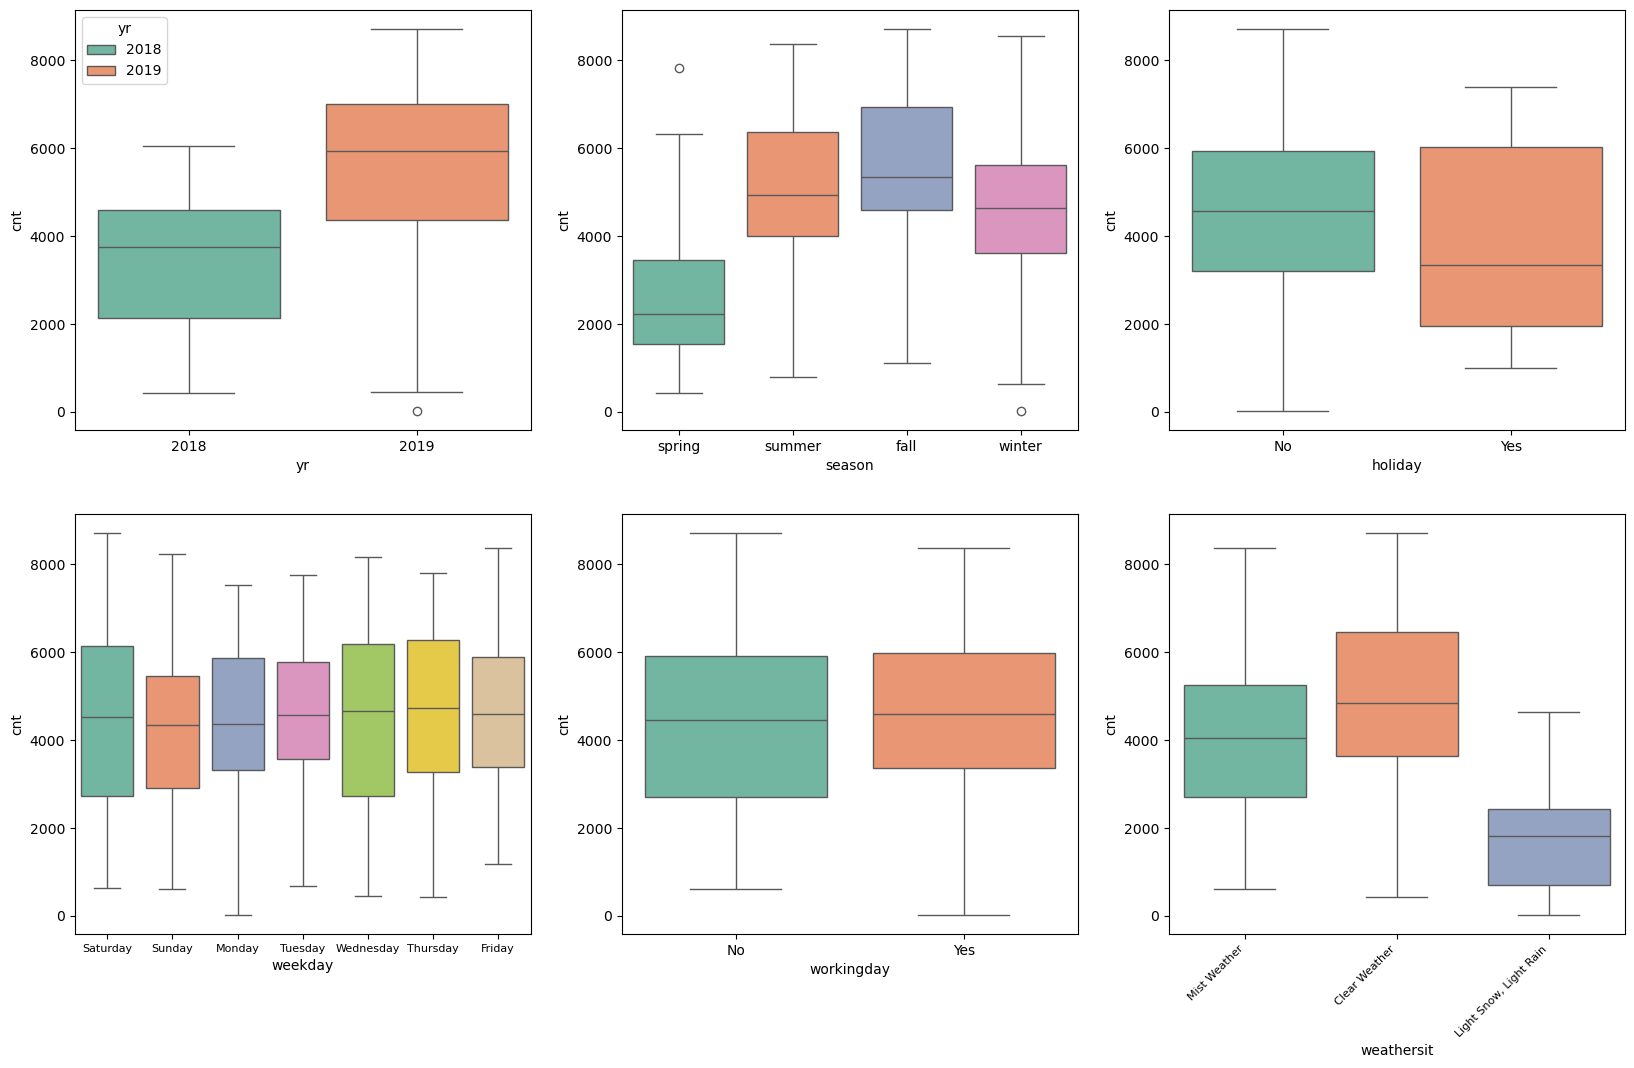

In [36]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df_EDA, palette='Set2' , hue = 'yr')
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = df_EDA, palette='Set2' , hue = 'season')
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_EDA, palette='Set2' , hue = 'holiday')
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_EDA, palette='Set2' , hue = 'weekday')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=8)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_EDA, palette='Set2' , hue = 'workingday')
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_EDA, palette='Set2' , hue = 'weathersit')
plt.xticks(rotation=45, horizontalalignment="right", fontsize=8)
plt.show()

## Univariate analysis

### Year

<Axes: xlabel='yr', ylabel='Count'>

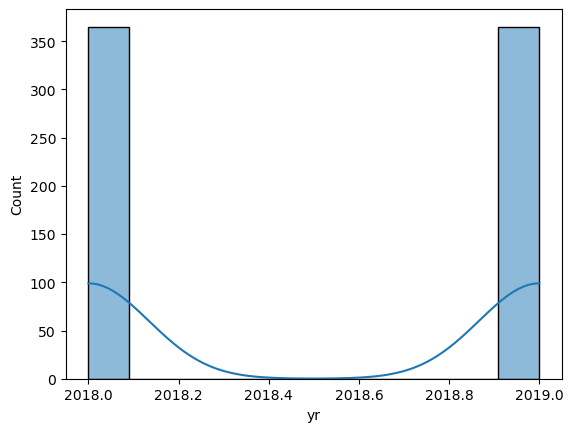

In [39]:
sns.histplot(data=df_EDA.yr,kde = True )

In [40]:
df_EDA.yr.value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

We can observe that the data given contains records of 365 days of 2018 and 2019, As the data is uniformly distributed there is no need to do univariate analysis of month, weekday as it will be evenly distributed as well

### count

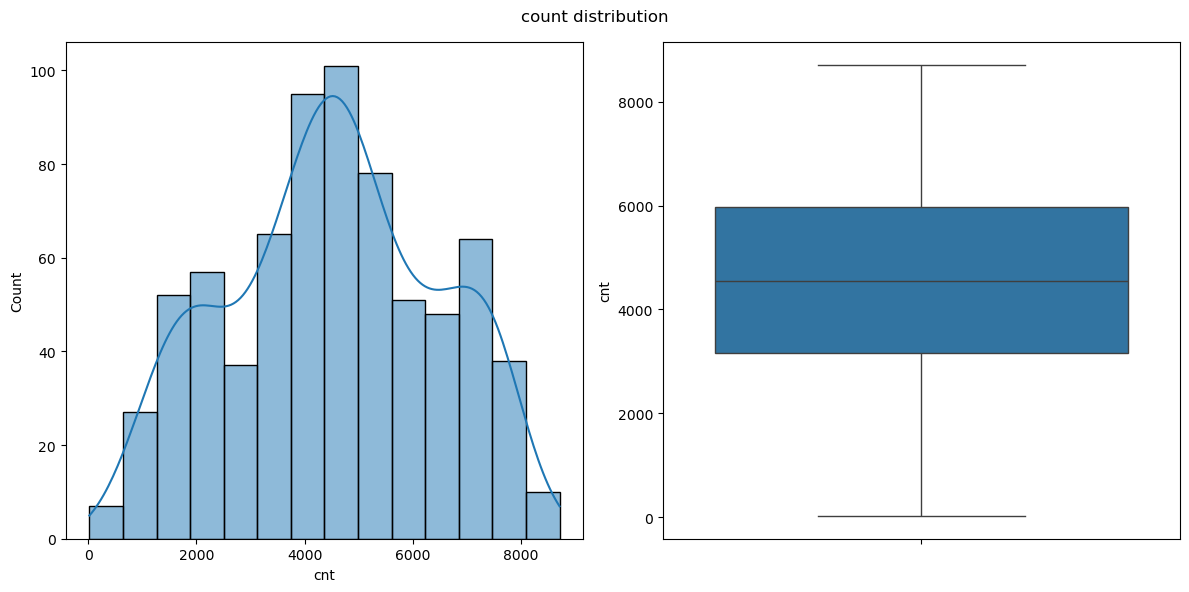

In [43]:
#Increasing the figure size of plot
#Setting subplot index
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
#Histogram plot
sns.histplot(data=df_EDA.cnt,kde = True , ax = axes[0])

#Box plot
sns.boxplot(data=df_EDA.cnt , ax = axes[1])
#Single title for both subplots.
plt.suptitle('count distribution')
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [44]:
df_EDA.cnt.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

We can observe that the count ranges from minimum of 22 to maximum of 8714 rentals in one day

### Season

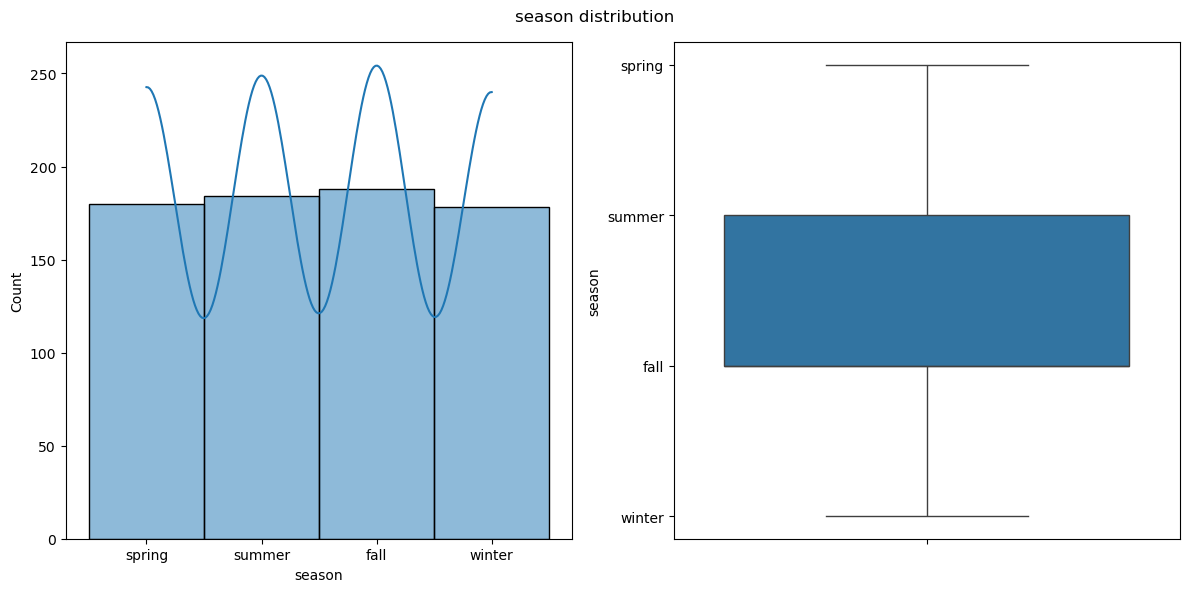

In [47]:
#Increasing the figure size of plot
#Setting subplot index
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
#Histogram plot
sns.histplot(data=df_EDA.season,kde = True , ax = axes[0])

#Box plot
sns.boxplot(data=df_EDA.season , ax = axes[1])
#Single title for both subplots.
plt.suptitle('season distribution')
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

There is no significant information could be obtained from the univariate analysis of season as it is expected that it will be uniformly distributed

### temp

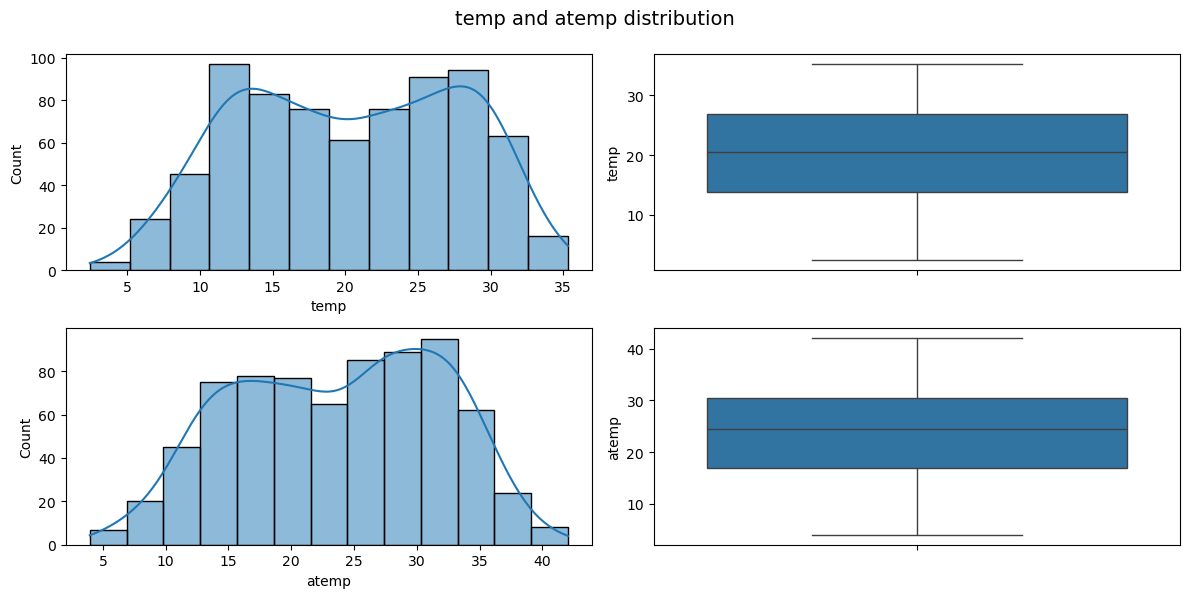

In [50]:
#Increasing the figure size of plot
#Setting subplot index
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
#Histogram plot
sns.histplot(data=df_EDA.temp,kde = True , ax = axes[0][0])

#Box plot
sns.boxplot(data=df_EDA.temp , ax = axes[0][1])
#Single title for both subplots.
# Single title for the first row
fig.suptitle('temp and atemp distribution', fontsize=14, y = 0.99)

#Histogram plot
sns.histplot(data=df_EDA.atemp,kde = True , ax = axes[1][0])

#Box plot
sns.boxplot(data=df_EDA.atemp , ax = axes[1][1])
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [51]:
df_EDA.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [52]:
df_EDA.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

It can be observed that temp and atemp is highly correlated and it can be concluded that atemp(feeling temperature) is slightly higher than actual temperature in celcius

### Windspeed

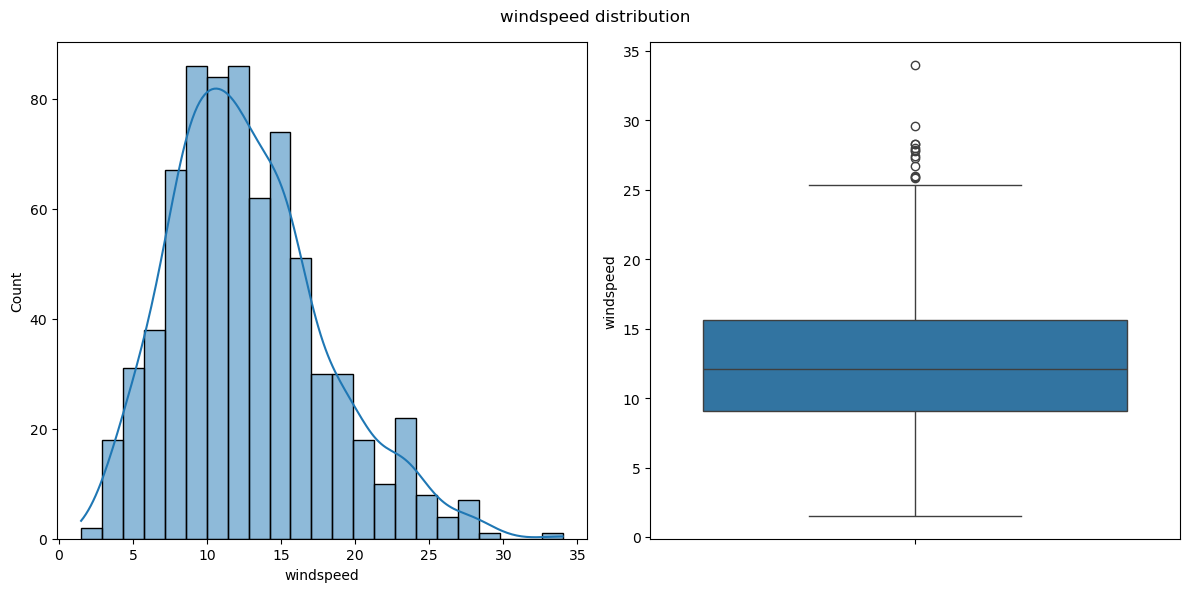

In [55]:
#Increasing the figure size of plot
#Setting subplot index
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
#Histogram plot
sns.histplot(data=df_EDA.windspeed,kde = True , ax = axes[0])

#Box plot
sns.boxplot(data=df_EDA.windspeed , ax = axes[1])
#Single title for both subplots.
plt.suptitle('windspeed distribution')
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [56]:
df_EDA.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

It can be observed that typically the wind speed ranges from 9 to 15, any value above 25 is an outlier

### Humidity

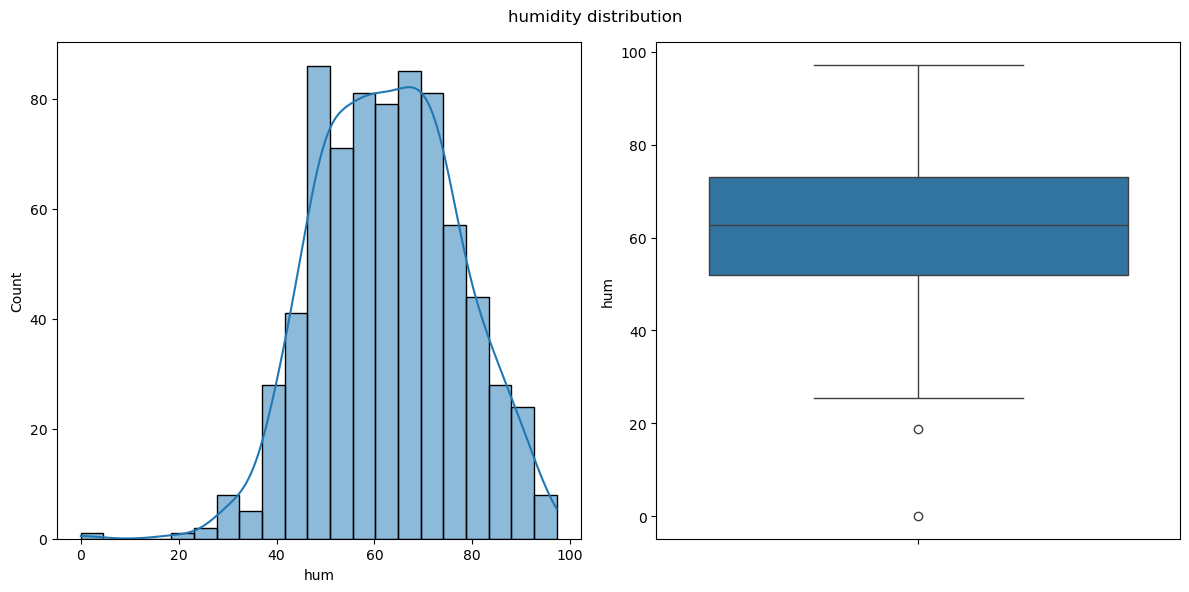

In [59]:
#Increasing the figure size of plot
#Setting subplot index
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
#Histogram plot
sns.histplot(data=df_EDA.hum,kde = True , ax = axes[0])

#Box plot
sns.boxplot(data=df_EDA.hum , ax = axes[1])
#Single title for both subplots.
plt.suptitle('humidity distribution')
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [60]:
df_EDA.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

It can be observed that the humidity ranges between 52 to 72, very few occurances are present where humidity is less than 20

## Bivariate analysis

As we are interested in relationship of variables with count we will focus only on count's relationship with other variables

### Holiday

<Axes: xlabel='holiday', ylabel='cnt'>

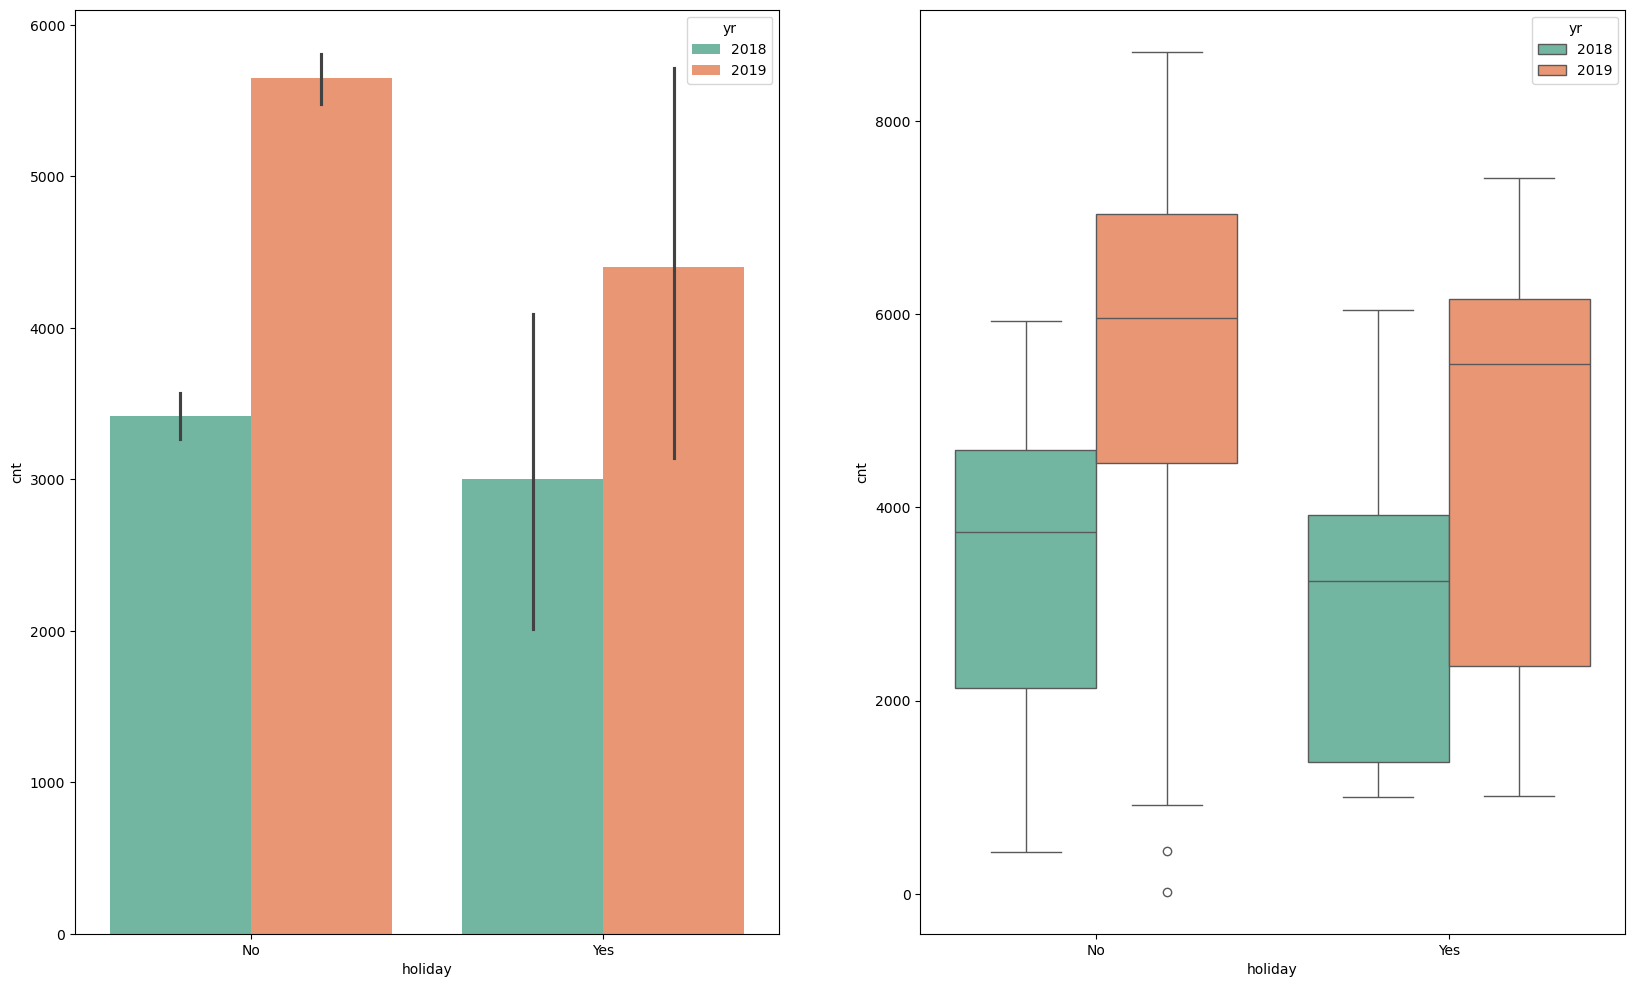

In [310]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.barplot(x = 'holiday', y = 'cnt', data = df_EDA, palette='Set2' , hue = 'yr')

plt.subplot(1,2,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_EDA, palette='Set2' , hue = 'yr')

### Season

<Axes: xlabel='season', ylabel='cnt'>

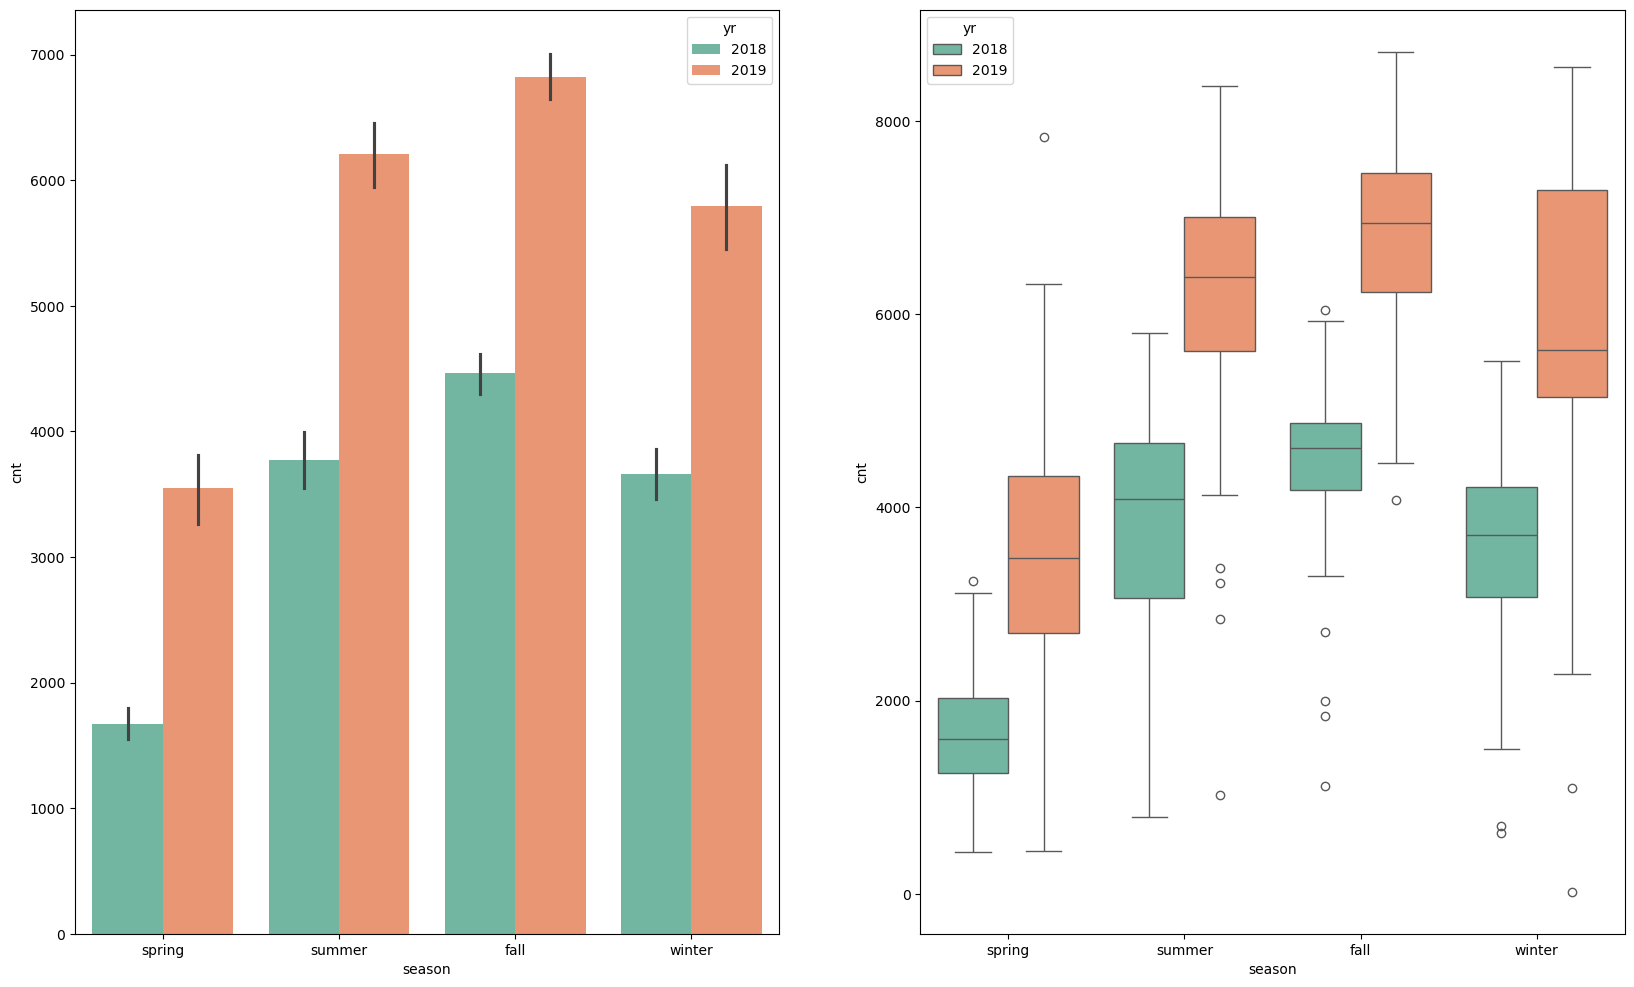

In [65]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.barplot(x = 'season', y = 'cnt', data = df_EDA, palette='Set2' , hue = 'yr')

plt.subplot(1,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = df_EDA, palette='Set2' , hue = 'yr')

### Month

<Axes: xlabel='mnth', ylabel='cnt'>

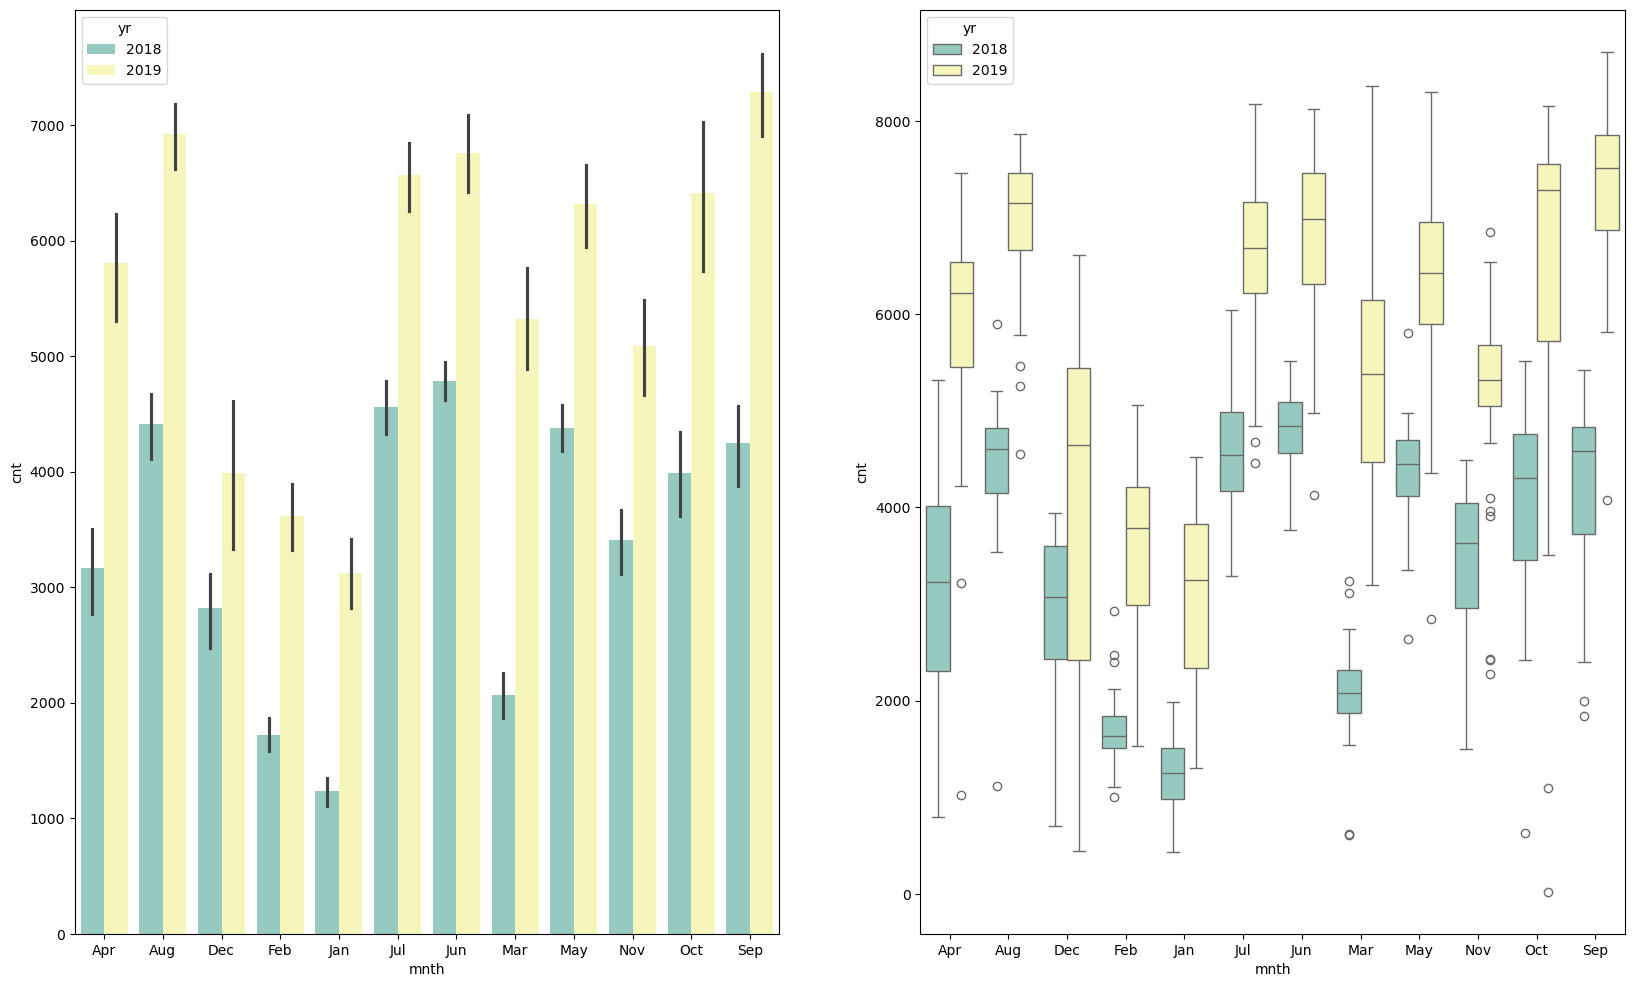

In [67]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.barplot(x = 'mnth', y = 'cnt', data = df_EDA, palette='Set3' , hue = 'yr')

plt.subplot(1,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_EDA, palette='Set3' , hue = 'yr')

### Weekday

<Axes: xlabel='weekday', ylabel='cnt'>

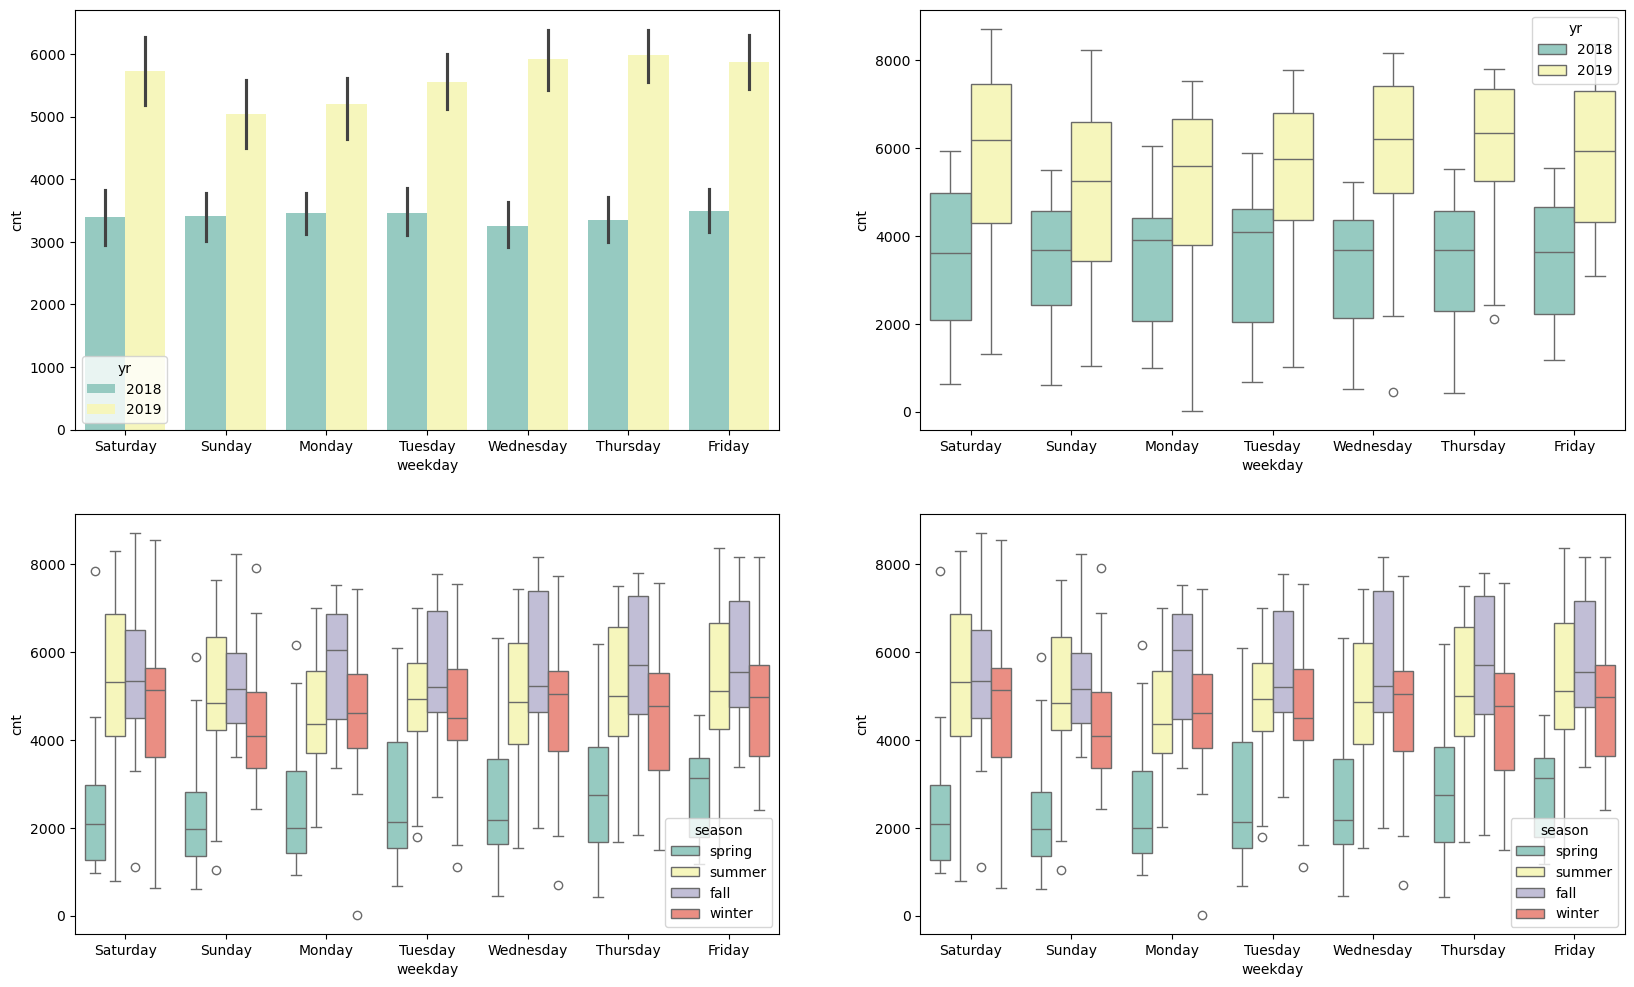

In [69]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x = 'weekday', y = 'cnt', data = df_EDA, palette='Set3' , hue = 'yr')

plt.subplot(2,2,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_EDA, palette='Set3' , hue = 'yr')

plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_EDA, palette='Set3' , hue = 'season')

plt.subplot(2,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_EDA, palette='Set3' , hue = 'season')

It can be observed from above plots that count of rentals is higher in 2019 as compared to 2018, if we look at the season and count relationship it can be seen that in spring least amount of rentals are present whereas in fall there is high amount of rentals in general.

### weather

([0, 1, 2],
 [Text(0, 0, 'Mist Weather'),
  Text(1, 0, 'Clear Weather'),
  Text(2, 0, 'Light Snow, Light Rain')])

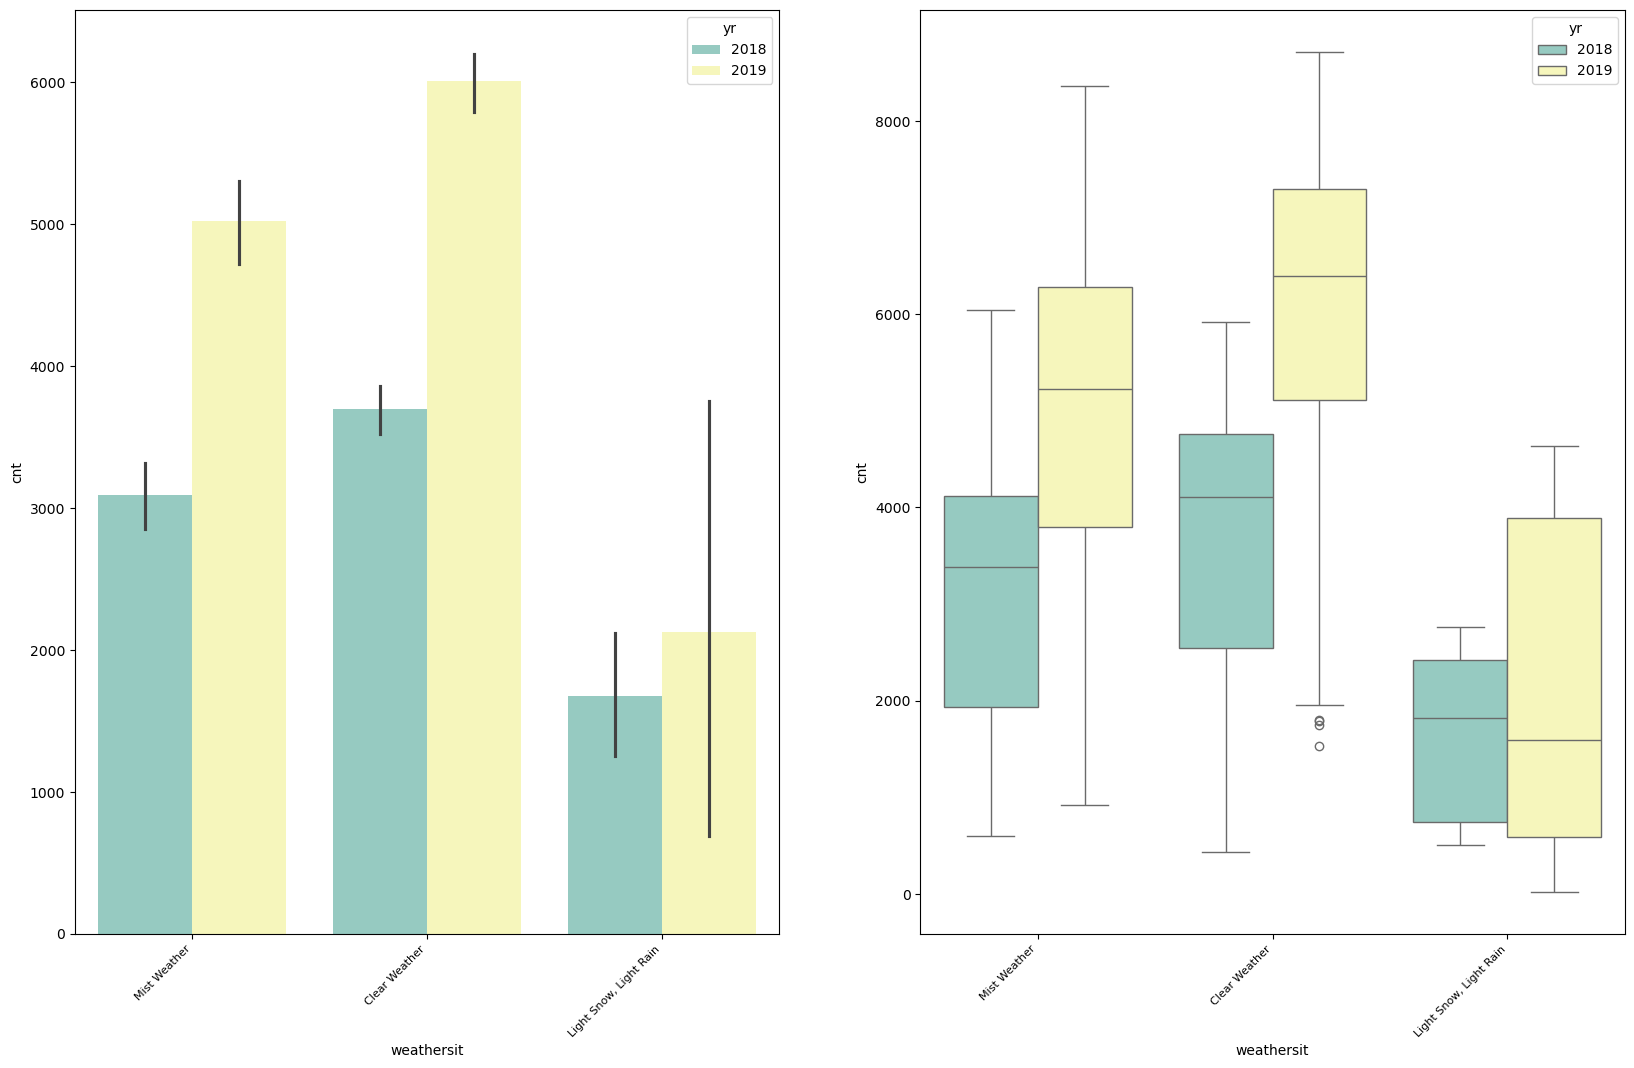

In [72]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.barplot(x = 'weathersit', y = 'cnt', data = df_EDA, palette='Set3' , hue = 'yr')
plt.xticks(rotation=45, horizontalalignment="right", fontsize=8)

plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_EDA, palette='Set3' , hue = 'yr')
plt.xticks(rotation=45, horizontalalignment="right", fontsize=8)

### Finding the correlations

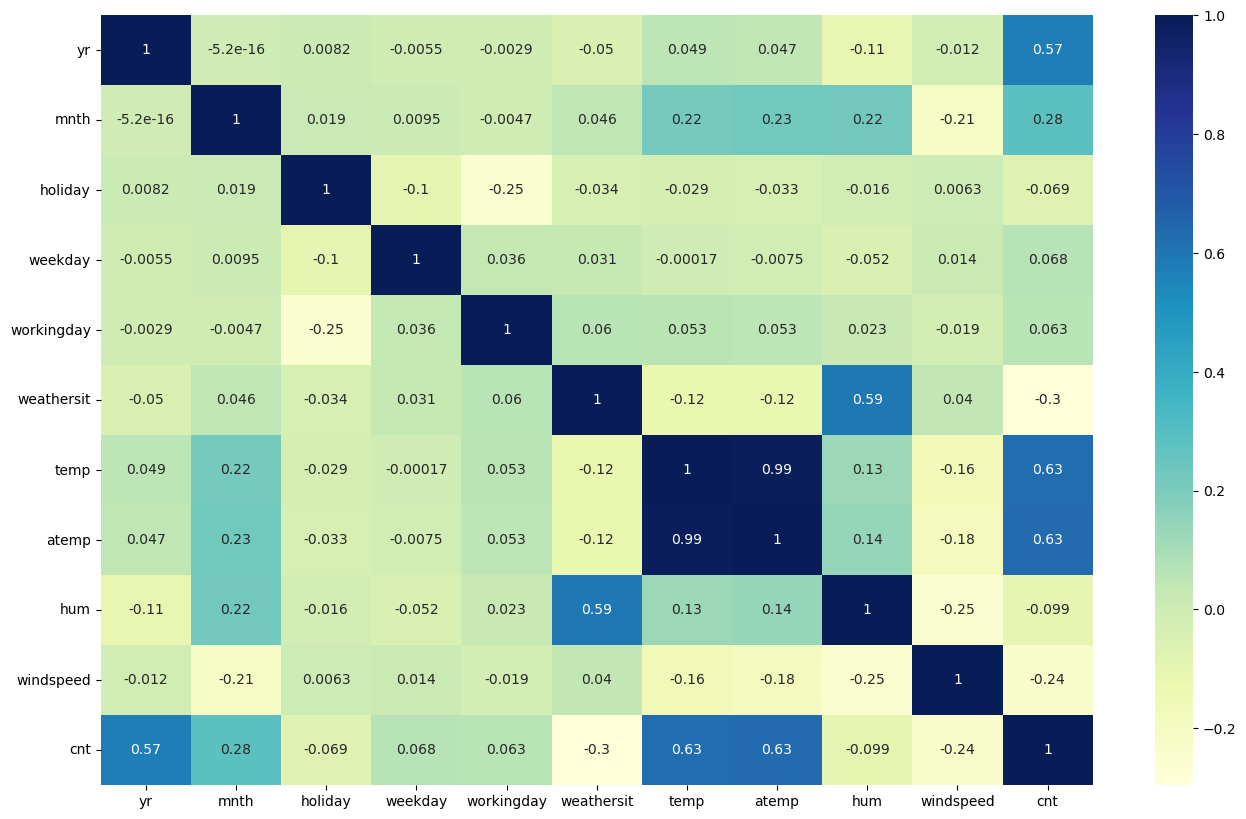

In [74]:
plt.figure(figsize = (16, 10))
sns.heatmap(df[['yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="YlGnBu")
plt.show()

We can observe that atemp and temp have very high correlation thus only one of the variables can be used as coliearity will affect the results

## Data Preparation

In [77]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df_EDA.mnth,drop_first=True, dtype=int)
weekdays_df=pd.get_dummies(df_EDA.weekday,drop_first=True , dtype=int)
weathersit_df=pd.get_dummies(df_EDA.weathersit,drop_first=True, dtype=int)
seasons_df=pd.get_dummies(df_EDA.season,drop_first=True,dtype=int )

In [78]:
df_prepared = pd.concat([df_EDA,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [79]:
df_prepared.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Light Snow, Light Rain', 'Mist Weather', 'spring', 'summer', 'winter'],
      dtype='object')

In [80]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   season                  730 non-null    object  
 1   yr                      730 non-null    int64   
 2   mnth                    730 non-null    category
 3   holiday                 730 non-null    object  
 4   weekday                 730 non-null    object  
 5   workingday              730 non-null    object  
 6   weathersit              730 non-null    object  
 7   temp                    730 non-null    float64 
 8   atemp                   730 non-null    float64 
 9   hum                     730 non-null    float64 
 10  windspeed               730 non-null    float64 
 11  cnt                     730 non-null    int64   
 12  Aug                     730 non-null    int32   
 13  Dec                     730 non-null    int32   
 14  Feb                     73

In [81]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_prepared.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [82]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    object 
 2   workingday              730 non-null    object 
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   Aug                     730 non-null    int32  
 9   Dec                     730 non-null    int32  
 10  Feb                     730 non-null    int32  
 11  Jan                     730 non-null    int32  
 12  Jul                     730 non-null    int32  
 13  Jun                     730 non-null    int32  
 14  Mar                     730 non-null    in

Converting holiday and workingday to numeric value

In [84]:
df_prepared.holiday = df.holiday
df_prepared.workingday = df.workingday
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   Aug                     730 non-null    int32  
 9   Dec                     730 non-null    int32  
 10  Feb                     730 non-null    int32  
 11  Jan                     730 non-null    int32  
 12  Jul                     730 non-null    int32  
 13  Jun                     730 non-null    int32  
 14  Mar                     730 non-null    in

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Spliting the train test data

In [87]:
df_train, df_test = train_test_split(df_prepared, train_size = 0.7, random_state = 100)

In [88]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [89]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain",Mist Weather,spring,summer,winter
576,2019,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,2019,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,2019,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,2019,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,2018,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [90]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [91]:
# Apply scaler() to all the columns except the'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [92]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain",Mist Weather,spring,summer,winter
576,2019,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,2019,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,2019,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,2019,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,2018,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      510 non-null    int64  
 1   holiday                 510 non-null    int64  
 2   workingday              510 non-null    int64  
 3   temp                    510 non-null    float64
 4   atemp                   510 non-null    float64
 5   hum                     510 non-null    float64
 6   windspeed               510 non-null    float64
 7   cnt                     510 non-null    float64
 8   Aug                     510 non-null    int32  
 9   Dec                     510 non-null    int32  
 10  Feb                     510 non-null    int32  
 11  Jan                     510 non-null    int32  
 12  Jul                     510 non-null    int32  
 13  Jun                     510 non-null    int32  
 14  Mar                     510 non-null    int32

In [94]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain",Mist Weather,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As We are done with pre-processing

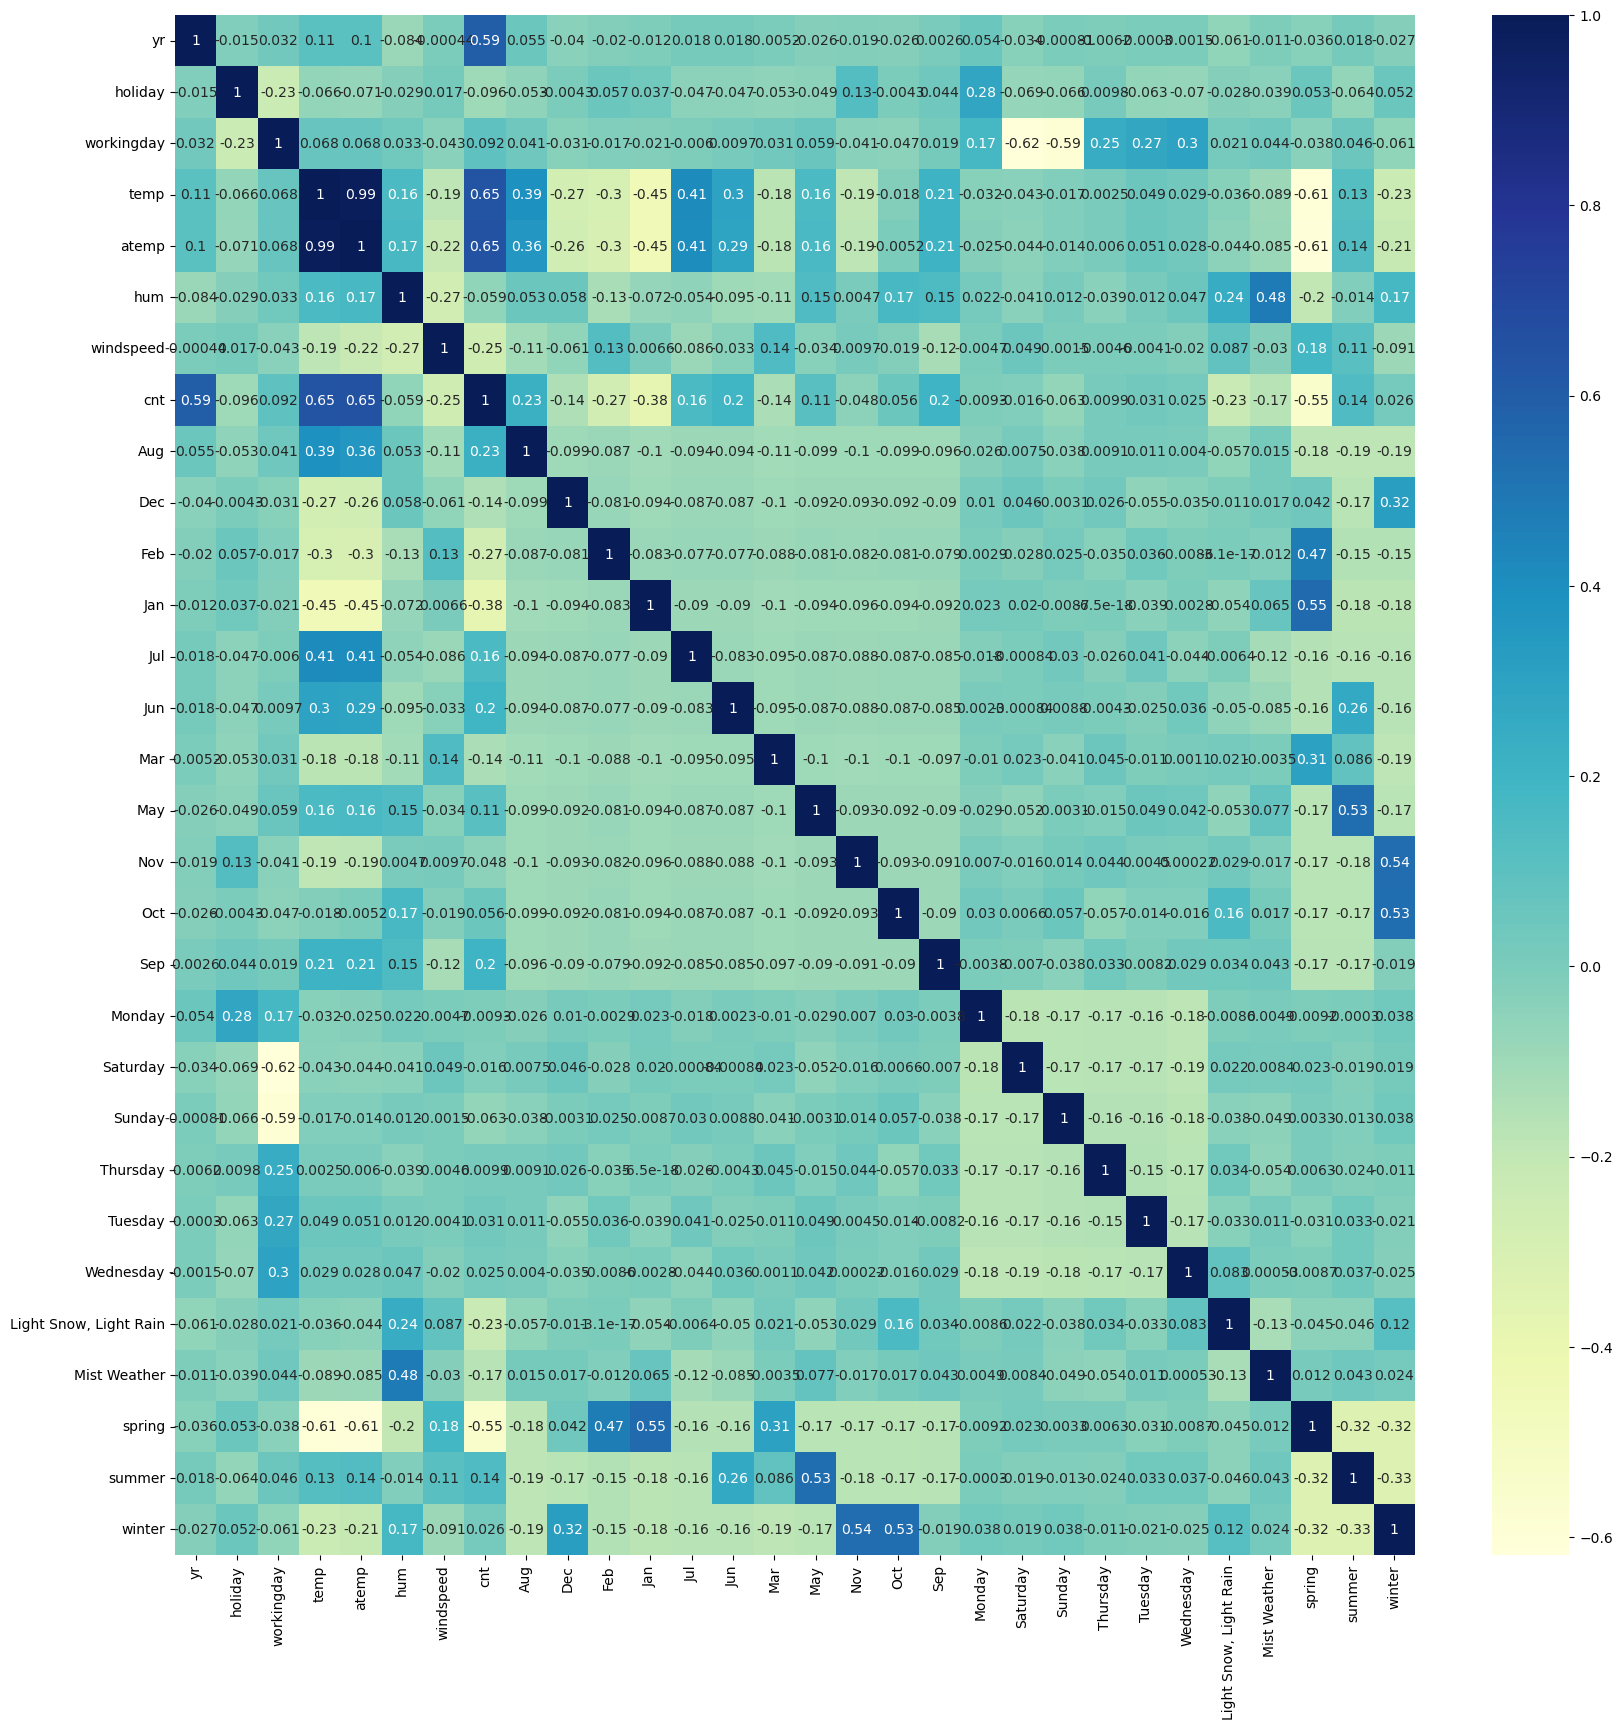

In [96]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can observe that year and temp,atemp has high correlation with cnt therefore they can serve as good starting point for model building 

In [98]:
#Buidling the model
Y_train = df_train.pop('cnt')
X_train = df_train

In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      510 non-null    int64  
 1   holiday                 510 non-null    int64  
 2   workingday              510 non-null    int64  
 3   temp                    510 non-null    float64
 4   atemp                   510 non-null    float64
 5   hum                     510 non-null    float64
 6   windspeed               510 non-null    float64
 7   Aug                     510 non-null    int32  
 8   Dec                     510 non-null    int32  
 9   Feb                     510 non-null    int32  
 10  Jan                     510 non-null    int32  
 11  Jul                     510 non-null    int32  
 12  Jun                     510 non-null    int32  
 13  Mar                     510 non-null    int32  
 14  May                     510 non-null    int32

As we have 28 features we will use Recursive Feature Elimination for getting most significant variables

In [101]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, Y_train)

In [102]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 4),
 ('Dec', False, 8),
 ('Feb', False, 6),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', False, 12),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 15),
 ('Light Snow, Light Rain', True, 1),
 ('Mist Weather', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [103]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jul', 'Sep',
       'Saturday', 'Sunday', 'Light Snow, Light Rain', 'Mist Weather',
       'spring', 'summer', 'winter'],
      dtype='object')


In [104]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [105]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [106]:
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,Jul,Sep,Saturday,Sunday,"Light Snow, Light Rain",Mist Weather,spring,summer,winter
576,2019,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,0,0
426,2019,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,1,1,0,0
728,2019,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,1,0,0
482,2019,0,0,0.395666,0.504508,0.188475,0,0,1,0,0,1,0,1,0
111,2018,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2019,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,2018,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,1,0,0
350,2018,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,1,0,0,1
79,2018,0,1,0.462664,0.759870,0.529881,0,0,0,0,0,1,0,1,0


In [107]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,11410887.34
8,Saturday,2612804.75
9,Sunday,2414474.40
1,holiday,429957.67
12,spring,5.02
3,temp,3.62
14,winter,3.49
13,summer,2.62
4,hum,1.91
11,Mist Weather,1.57


We can observe that workingday,Sunday,Saturday, Holiday, Spring has very high VIF values

## Building the model

In [110]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(Y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.11e-191
Time:                        11:00:47   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -370

### We will eliminate variables with very high VIF one by one and calculate VIF after each time

In [112]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,yr,74.04
3,hum,39.37
2,temp,23.70
11,spring,6.61
4,windspeed,5.47
13,winter,4.61
12,summer,3.48
10,Mist Weather,2.39
5,Jul,1.61
6,Sep,1.41


In [113]:
X_train_new

,yr,holiday,temp,hum,windspeed,Jul,Sep,Saturday,Sunday,"Light Snow, Light Rain",Mist Weather,spring,summer,winter
576,2019,0,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,0,0
426,2019,0,0.442393,0.640189,0.255342,0,0,1,0,0,1,1,0,0
728,2019,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,1,0,0
482,2019,0,0.395666,0.504508,0.188475,0,0,1,0,0,1,0,1,0
111,2018,0,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2019,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,2018,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,1,0,0
350,2018,0,0.248216,0.577930,0.431816,0,0,1,0,0,1,0,0,1
79,2018,0,0.462664,0.759870,0.529881,0,0,0,0,0,1,0,1,0


In [114]:
# As hum shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,yr,52.89
2,temp,22.32
10,spring,6.53
3,windspeed,5.01
12,winter,4.44
11,summer,3.45
4,Jul,1.60
9,Mist Weather,1.60
5,Sep,1.40
6,Saturday,1.24


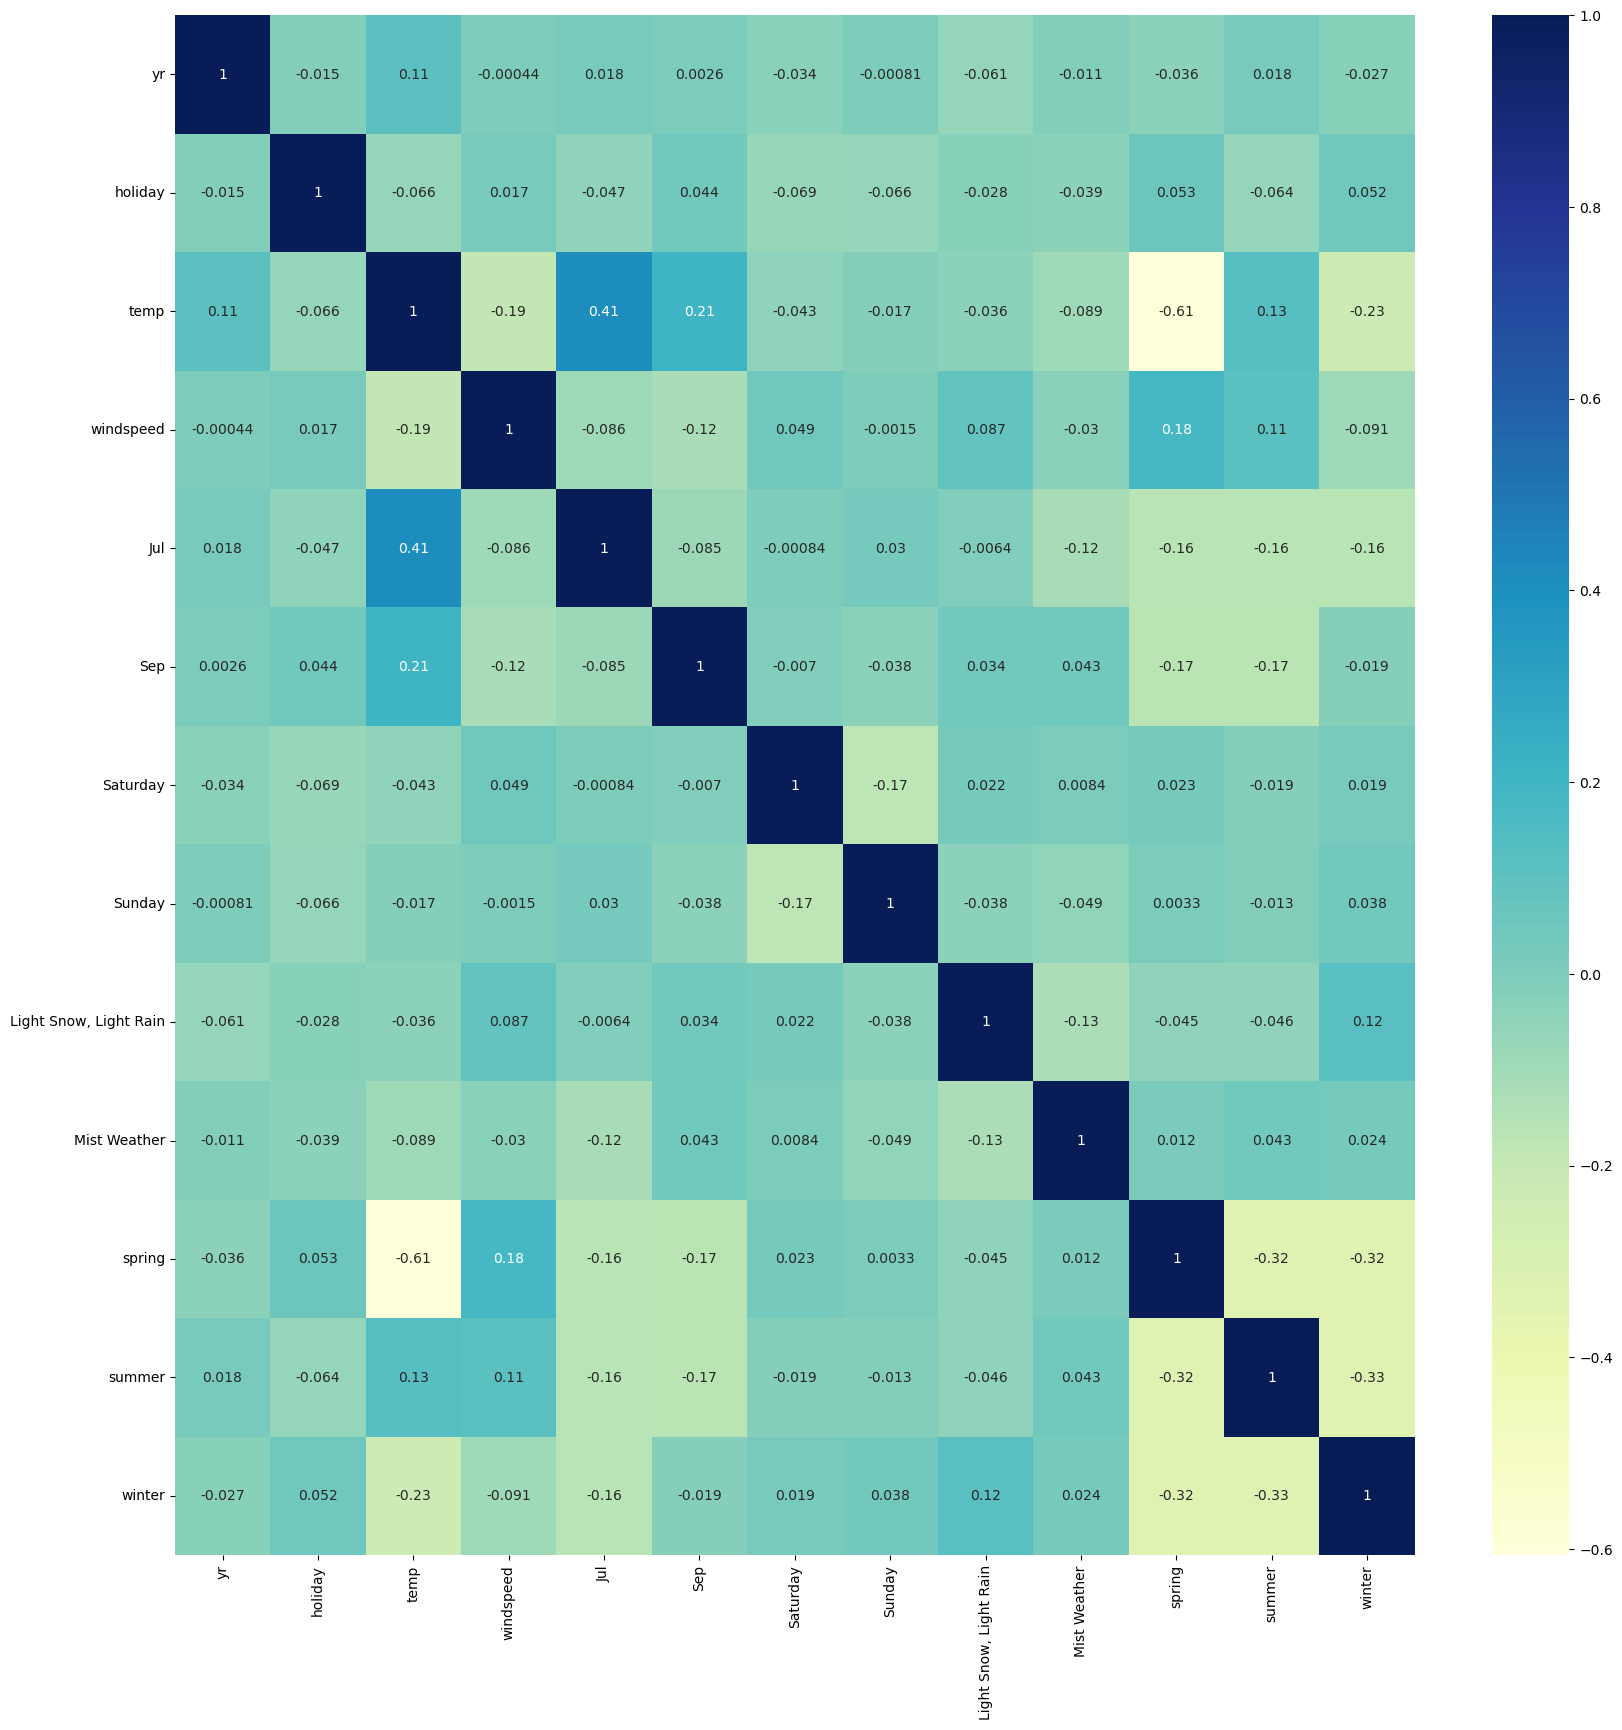

In [150]:
plt.figure(figsize = (20, 20))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [193]:
# As Jul shows high correlation with temp values hence we can drop it
X_train_new = X_train_new.drop(['Jul'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,yr,52.37
2,temp,21.88
9,spring,6.27
3,windspeed,5.01
11,winter,4.12
10,summer,2.98
8,Mist Weather,1.59
4,Sep,1.28
5,Saturday,1.24
6,Sunday,1.22


In [195]:
#building 2nd model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(Y_train,X_train_lm_2).fit()
print(lr_2.summary())
print(calculateVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.16e-188
Time:                        11:02:56   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -472

In [197]:
# As Saturday shows high P value hence we can drop it
X_train_new = X_train_new.drop(['Saturday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,yr,52.05
2,temp,21.86
8,spring,6.27
3,windspeed,5.00
10,winter,4.12
9,summer,2.98
7,Mist Weather,1.59
4,Sep,1.28
5,Sunday,1.18
6,"Light Snow, Light Rain",1.08


In [199]:
#building 3rd model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(Y_train,X_train_lm_3).fit()
print(lr_3.summary())
print(calculateVIF(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.23e-189
Time:                        11:04:22   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -472

Removing year as it has high VIF

In [204]:
# As yr shows high VIF value hence we can drop it
X_train_new_no_yr = X_train_new.copy()
X_train_new_no_yr = X_train_new_no_yr.drop(['yr'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new_no_yr)

,Features,VIF
2,windspeed,4.59
1,temp,3.36
7,spring,1.95
8,summer,1.89
9,winter,1.62
6,Mist Weather,1.55
3,Sep,1.23
4,Sunday,1.18
5,"Light Snow, Light Rain",1.08
0,holiday,1.05


VIF values look ok so creating a model again

In [207]:
#building 4th model
X_train_lm_4 = sm.add_constant(X_train_new_no_yr)
lr_4 = sm.OLS(Y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     66.58
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           2.55e-85
Time:                        11:08:47   Log-Likelihood:                 255.06
No. Observations:                 510   AIC:                            -488.1
Df Residuals:                     499   BIC:                            -441.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [209]:
X_train_new

,yr,holiday,temp,windspeed,Sep,Sunday,"Light Snow, Light Rain",Mist Weather,spring,summer,winter
576,2019,0,0.815169,0.264686,0,0,0,0,0,0,0
426,2019,0,0.442393,0.255342,0,0,0,1,1,0,0
728,2019,0,0.245101,0.663106,0,1,0,0,1,0,0
482,2019,0,0.395666,0.188475,0,0,0,1,0,1,0
111,2018,0,0.345824,0.380981,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,2019,0,0.863973,0.187140,0,0,0,0,0,0,0
53,2018,0,0.202618,0.111379,0,0,0,0,1,0,0
350,2018,0,0.248216,0.431816,0,0,0,1,0,0,1
79,2018,0,0.462664,0.529881,0,0,0,1,0,1,0


We can clearly observe that removing year caused massive drop in R-square value which indicates that year is very significant variable and must be included.

In [211]:
# As Sunday and holiday are also related removing sunday
X_train_new = X_train_new.drop(['Sunday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,yr,51.87
2,temp,21.86
7,spring,6.27
3,windspeed,5.00
9,winter,4.12
8,summer,2.98
6,Mist Weather,1.59
4,Sep,1.28
5,"Light Snow, Light Rain",1.08
1,holiday,1.04


In [215]:
#building 5th model
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(Y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.47e-186
Time:                        11:14:09   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -472

In [217]:
lr_5.params

const                    -472.287164
yr                          0.234132
holiday                    -0.096316
temp                        0.477737
windspeed                  -0.148098
Sep                         0.090998
Light Snow, Light Rain     -0.285031
Mist Weather               -0.078741
spring                     -0.055406
summer                      0.062076
winter                      0.094476
dtype: float64

## Residual Analysis of the train data and validation

In [226]:
y_train_pred = lr_5.predict(X_train_lm_5)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

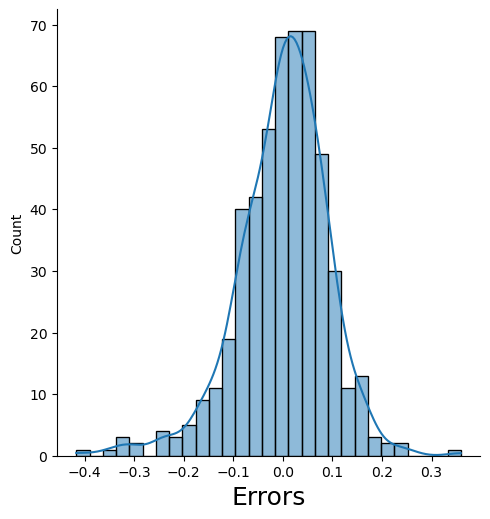

In [228]:

# Plot the histogram of the error terms

fig = plt.figure()
sns.displot((Y_train - y_train_pred), kind='hist', kde=True)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Checking the multicolinerairy

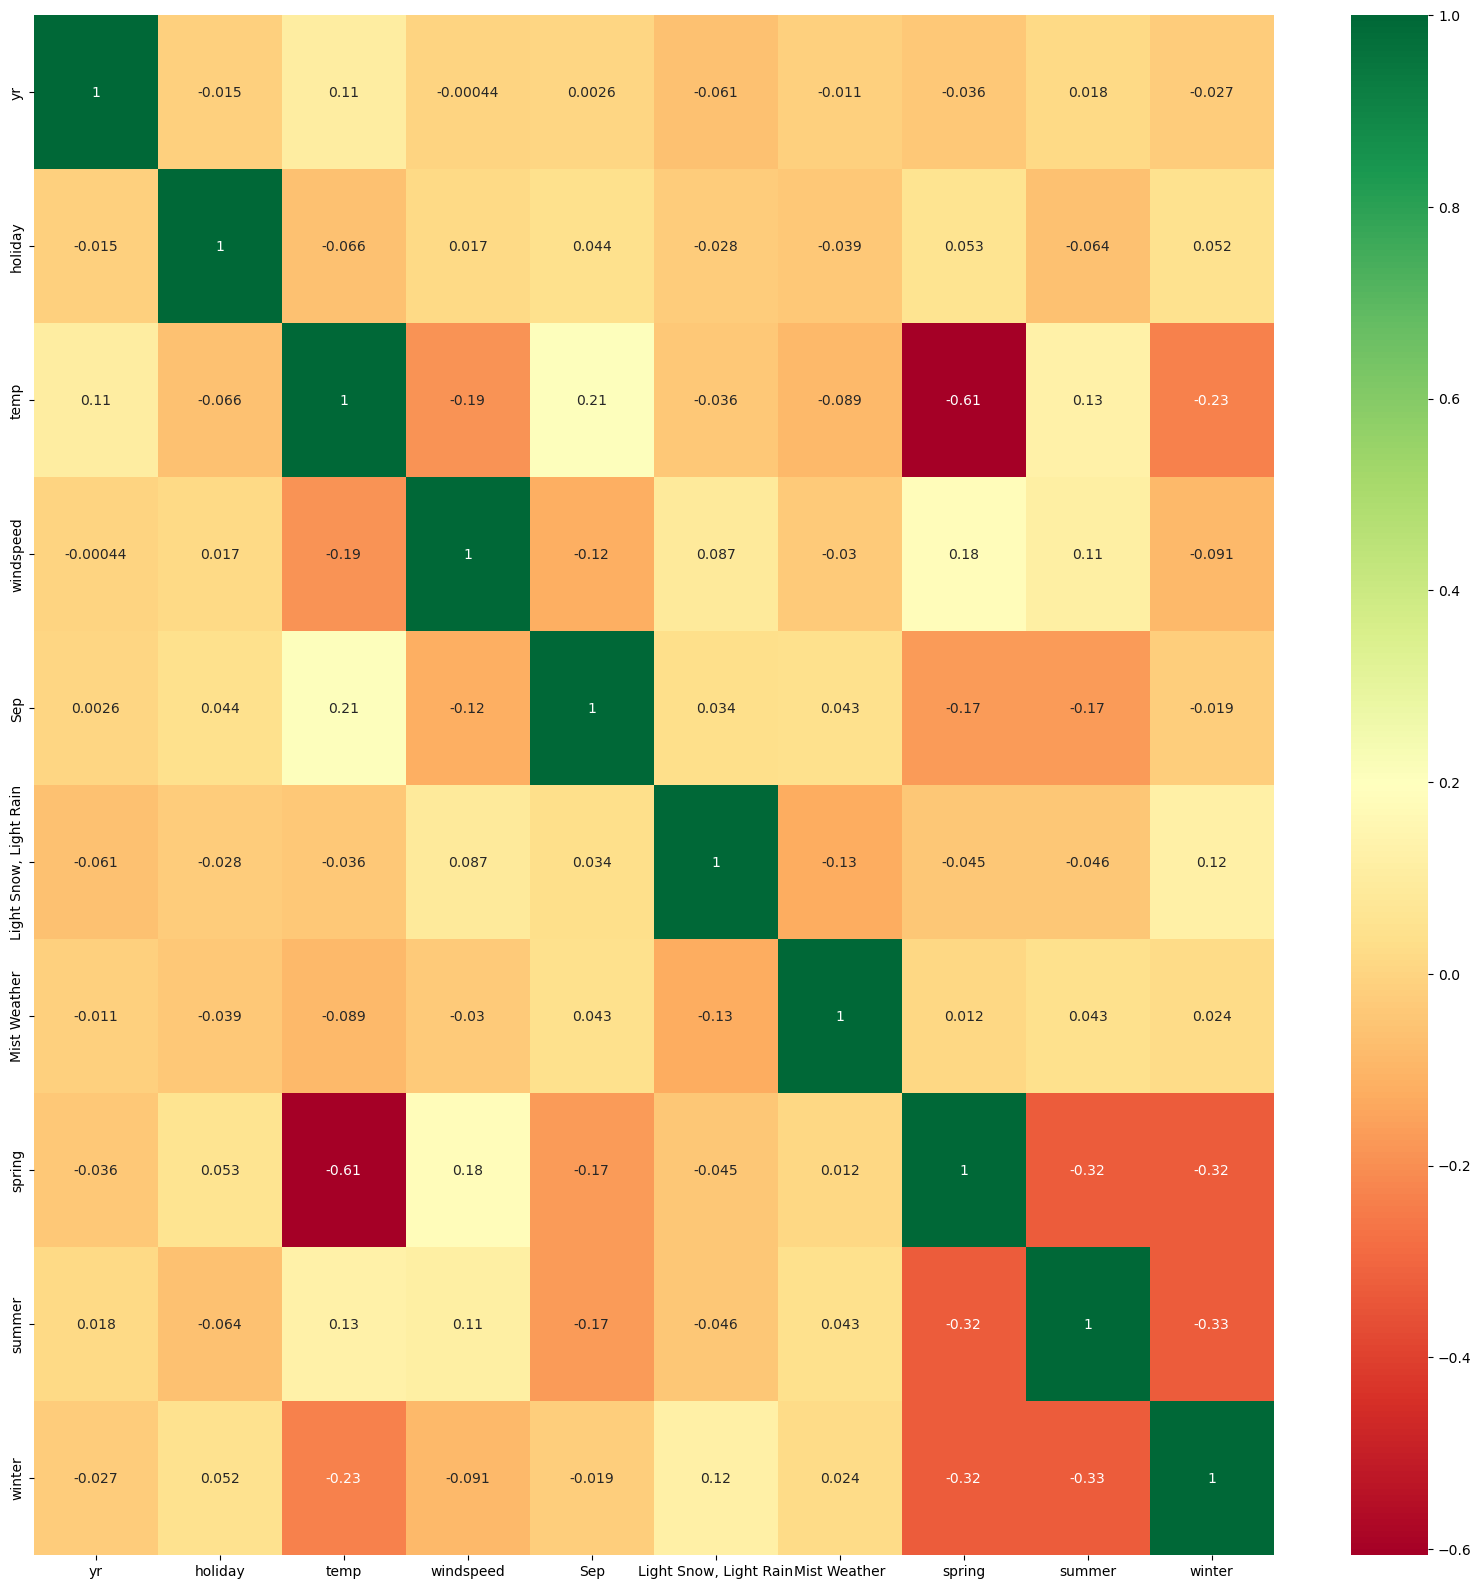

In [230]:
plt.figure(figsize = (20, 20))
sns.heatmap(X_train_new.corr(), annot = True, cmap="RdYlGn")
plt.show()

### Linearity

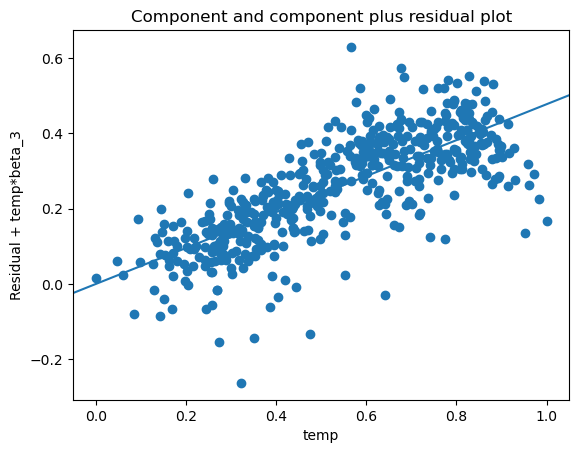

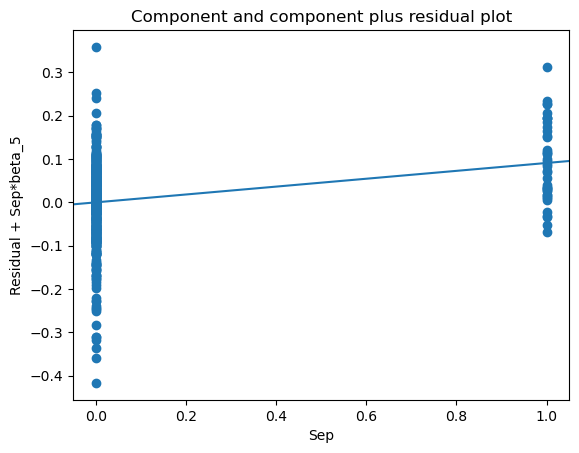

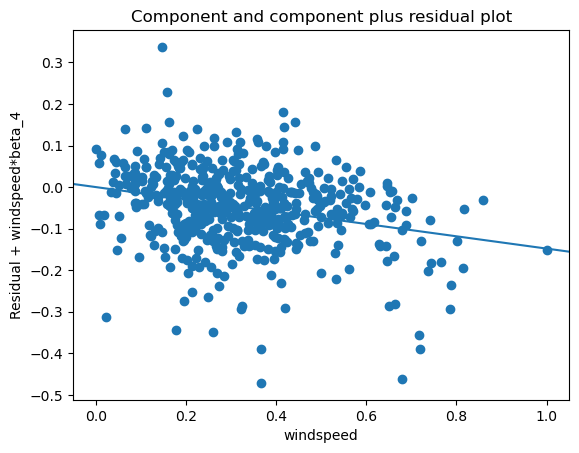

In [262]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'Sep')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

### Homoscedasticity

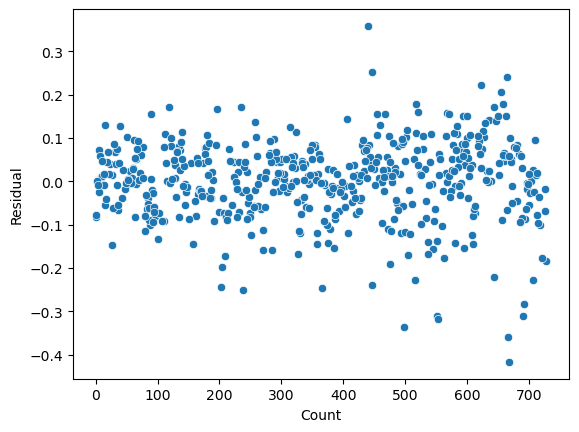

In [287]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = Y_train - y_train_pred
sns.scatterplot(residual)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

# Making predictions

In [232]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain",Mist Weather,spring,summer,winter
184,2018,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,2019,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,2018,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,2018,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,2018,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [234]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Light Rain",Mist Weather,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2018.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,2018.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,2019.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [236]:
y_test = df_test.pop('cnt')
X_test = df_test

In [248]:

col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [250]:
y_pred = lr_5.predict(X_test_lm_5)

In [252]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

# Model Evaluation

Text(0, 0.5, 'y_pred')

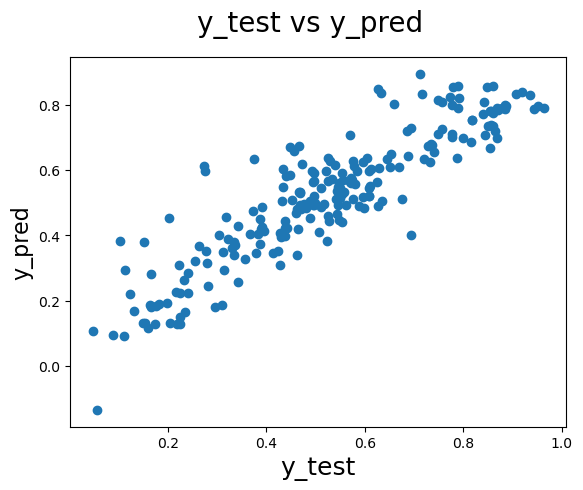

In [290]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [294]:
round(lr_5.params,4)

const                    -472.2872
yr                          0.2341
holiday                    -0.0963
temp                        0.4777
windspeed                  -0.1481
Sep                         0.0910
Light Snow, Light Rain     -0.2850
Mist Weather               -0.0787
spring                     -0.0554
summer                      0.0621
winter                      0.0945
dtype: float64

We can conclude that that the equation of our best fitted line is:

**cnt = -472.2872 + ( 0.2341 * yr) +(-0.0963* holiday) + ( 0.4777 * temp) + (-0.1481 * windspeed) + (0.0910* Sep)+ (-0.2850 * Light Snow, Light Rain) +
(-0.0787 * Mist Weather) + (-0.0554  * spring) + (0.0621 * summer)+ (0.0945 * winter)

In [300]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


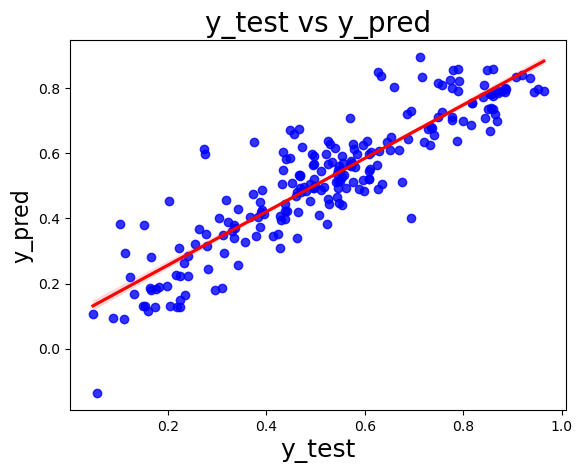

In [292]:

# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [1413]:
X_train_lm_5.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'Sep',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'spring', 'winter'],
      dtype='object')

# Summary

In [302]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.47e-186
Time:                        21:34:45   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -472.2872     16.734    -28.223      0.000    -505.165    -439.410
yr                         0.2341      0.008     28.237      0.000       0.218       0.250
holiday                   -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp                       0.4777      0.033     14.423      0.000       0.413       0.543
windspeed                 -0.1481      0.025     -5.854      0.000      -0.198      -0.098
Sep                        0.0910      0.016      5.566      0.000       0.059       0.123
Light Snow, Light Rain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Mist Weather              -0.0787      0.009     -8.938      0.000      -0.096      -0.061
spring                    -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer                     0.0621      0.014      4.350      0.000       0.034       0.090
winter                     0.0945      0.017      5.630      0.000       0.062       0.127
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                     8.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We can conclude that rental bike demand depend on year, holiday, temp, windspeed , Sep, Light Snow-Light Rain,Mist Weather, spring, summer, winter